In [1]:
### IMPORT LIBRARIES

import graphlab as gl
import pandas as pd
import numpy as np
import matplotlib as plt
from scipy import stats
import pickle

In [4]:
### DEFINE FUNCTIONS TO IMPORT JASON DATA

import json

def ParseJSON(fileName=None):

   data = []
   if fileName is None: raise ValueError("fileName cannot be None")
   with open(fileName) as fp:
        for line in fp:
            data.append(json.loads(line))


   return(data)


#### pass the data list and the token, get the list of the particular field back
def ProcessID(data,token):

   ID = []

   for item in data:

       ID.append(item[token])

   return(ID)

In [5]:
######## LOAD ONLY 1,2, OR 3

### 1. LOAD ORIGINAL DATA

#biz = pd.DataFrame(ParseJSON(fileName = 'Data/yelp_academic_dataset_business.json'))
#biz.shape
#data = biz[:]

In [ ]:
### 2. LOAD BINARY DATA - BIZ DATA with RESTO INDICATOR
#gdata = gl.load_sframe('businessdatabinary')
#biz = gdata.to_dataframe()
#data = biz[:]

In [5]:
### 3. LOAD BINARY DATA - BIZ DATA with RESTOS ONLY
#gdata = gl.load_sframe('restosdatabinary')
#biz = gdata.to_dataframe()
#data = biz[:]

In [77]:
###********* DO NOT RUN!!! ***********************
### ADD RESTO INDICATOR TO EACH RECORD
#resto = ["Restaurants","Bistros","Brasseries","Cafes","Delicatessen"]
#record=[]
#data.loc[:,"restoind"] = 0

In [78]:
### GREG CODE TO ADD RESTO INDICATOR
#for i in range(data.shape[0]):
#    record = data.iloc[i,:]
#    k=0
#    if not i % 1000:
#        print i
#    for cat in record['categories']:
#        if k > 0:
#            break
#        if (cat in resto):
#            k += 1 
#            data.iloc[i,15]=1

In [17]:
### CODE1 TO ADD RESTO INDICATOR
# categories = data['categories']

# for i in range(categories.shape[0]):
#    if not i % 1000:
#        print i
#    var = categories.iloc[i]
#    if len((set(var).intersection(set(resto))))>0: data.iloc[i,15] = 1

In [ ]:
### ALTERNATIVE CODE2 TO ADD RESTO INDICATOR
# categories = data['categories']

# ans = [True if len((set(var).intersection(set(resto)))>0 else False for var in categories]
# data['isResto'] = ans

In [ ]:
### DO NOT RUN. DATA ALREADY PROCESSED BEFOREHAND
### TO SAVE BUSINESS DATA IN PICKLE
#with open("bizdata.pkl", 'wb') as f:
#   pickle.dump(data, f)

In [2]:
### DO NOT RUN. RESTO DATA ALREADY CREATED BY THIS PREVIOUSLY
### TO LOAD BUSINESS DATA FROM PICKLE
#with open("bizdata.pkl", 'rb') as f:
#   data = pickle.load(f)

#print data.shape
#data.head(2)

In [47]:
### CREATE NEW DATAFRAME WITH RESTAURANT TYPES ONLY
#restodata = data.loc[data["restoind"]==1,]
#restodata = restodata.iloc[:,:14]

In [45]:
### SAVE RESTO DATA IN BINARY FORMAT USING GRAPHLAB FUNCTIONS
# gl.SFrame(restoreduced).save('restosdatabinary')

In [224]:
### TO SAVE RESTO DATA IN PICKLE
import pickle
with open("restodata3.pkl", 'wb') as f:
   pickle.dump(restodata, f)

In [3]:
### TO LOAD DATA FROM PICKLE
with open("restodata3.pkl", 'rb') as f:
   data = pickle.load(f)

print data.shape
data.head(2)

(25082, 17)


,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,PriceRange,LogReviewCnt,Outdoor
0,"{u'Take-out': True, u'Drive-Thru': False, u'Al...",5UmKMjUEUNdYWqANhGckJw,"[Fast Food, Restaurants]",Dravosburg,"4734 Lebanon Church Rd\nDravosburg, PA 15034","{u'Tuesday': {u'close': u'21:00', u'open': u'1...",40.354327,-79.900706,Mr Hoagie,[],True,4,4.5,PA,1.0,1.386294,0.0
5,"{u'Alcohol': u'full_bar', u'Noise Level': u'av...",mVHrayjG3uZ_RLHkLj-AMg,"[Bars, American (New), Nightlife, Lounges, Res...",rankin,"414 Hawkins Ave\nrankin, PA 15104","{u'Tuesday': {u'close': u'19:00', u'open': u'1...",40.413464,-79.880247,Emil's Lounge,[],True,20,5.0,PA,1.0,2.995732,0.0


In [4]:
### CREATE DUPLICATE OF DATA
restodata = data[:]

In [5]:
restodata.describe()

,latitude,longitude,review_count,stars,PriceRange,LogReviewCnt,Outdoor
count,25082.000000,25082.000000,25082.000000,25082.000000,25082.000000,25082.000000,25082.000000
mean,38.250452,-93.123086,59.529663,3.430348,1.725939,3.078413,0.378917
std,6.048762,30.914435,145.558399,0.877325,0.714835,1.345747,0.485127
min,32.876619,-115.351900,3.000000,1.000000,1.000000,1.098612,0.000000
25%,33.565844,-112.273148,7.000000,3.000000,1.000000,1.945910,0.000000
50%,36.071293,-111.869248,19.000000,3.500000,2.000000,2.944439,0.000000
75%,43.014973,-80.044005,57.000000,4.000000,2.000000,4.043051,1.000000
max,56.036545,8.549249,5642.000000,5.000000,4.000000,8.637994,1.000000


In [9]:
### CREATE MINI DATASET FOR TESTING CODE
minidata = restodata[:20]

In [12]:
print restodata.keys()
restodata.describe()

Index([   u'attributes',   u'business_id',    u'categories',          u'city',
        u'full_address',         u'hours',      u'latitude',     u'longitude',
                u'name', u'neighborhoods',          u'open',  u'review_count',
               u'stars',         u'state',    u'PriceRange',  u'LogReviewCnt',
             u'Outdoor'],
      dtype='object')


,latitude,longitude,review_count,stars,PriceRange,LogReviewCnt,Outdoor
count,25082.000000,25082.000000,25082.000000,25082.000000,25082.000000,25082.000000,25082.000000
mean,38.250452,-93.123086,59.529663,3.430348,1.725939,3.078413,0.378917
std,6.048762,30.914435,145.558399,0.877325,0.714835,1.345747,0.485127
min,32.876619,-115.351900,3.000000,1.000000,1.000000,1.098612,0.000000
25%,33.565844,-112.273148,7.000000,3.000000,1.000000,1.945910,0.000000
50%,36.071293,-111.869248,19.000000,3.500000,2.000000,2.944439,0.000000
75%,43.014973,-80.044005,57.000000,4.000000,2.000000,4.043051,1.000000
max,56.036545,8.549249,5642.000000,5.000000,4.000000,8.637994,1.000000


In [ ]:
#### *********** DO NOT RUN!!! DATA ALREADY CREATED PREVIOUSLY *****

In [ ]:
############### START FEATURE MODIFICATION AND ADDITION ###############

In [162]:
### GET PRICE RANGE OF RESTAURANTS

pricerange=[]
for i in range(len(restodata)):
    x = restodata.iloc[i].attributes.get("Price Range")
    pricerange.append(x)

print len(pricerange)
print sum([1 for x in pricerange if x!=None])

pricerange[:20]

25082
23415


[1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, None, 2]

In [163]:
### ADD PRICE RANGE COLUMN

restodata['PriceRange']=pricerange
print restodata.keys()
restodata.shape

Index([   u'attributes',   u'business_id',    u'categories',          u'city',
        u'full_address',         u'hours',      u'latitude',     u'longitude',
                u'name', u'neighborhoods',          u'open',  u'review_count',
               u'stars',         u'state',    u'PriceRange'],
      dtype='object')


/Users/gldomingo/Data_Science/anaconda/envs/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


(25082, 15)

In [164]:
### VIEW PRICE RANGE COUNTS
restodata['PriceRange'].value_counts()

2.0    11246
1.0    10499
3.0     1382
4.0      288
Name: PriceRange, dtype: int64

In [165]:
### ADD LOG OF REVIEW COUNTS COLUMN

restodata['LogReviewCnt']= np.log(restodata['review_count'])

/Users/gldomingo/Data_Science/anaconda/envs/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [166]:
### GET OUTDOOR SEATING OF RESTAURANTS

outdoor = []
for i in range(len(restodata)):
    x = restodata.iloc[i].attributes.get("Outdoor Seating")
    if x == None:
        outdoor.append(x)
    else:
        outdoor.append(int(x))

print len(outdoor)
sum([1 for x in outdoor if x==1])

outdoor[:20]

25082


[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, None, 1]

In [170]:
### ADD OUTDOOR INDICATOR TO RESTO DATAFRAME
restodata['Outdoor']=outdoor
print restodata.keys()
print restodata.shape
restodata['Outdoor'].value_counts()

Index([   u'attributes',   u'business_id',    u'categories',          u'city',
        u'full_address',         u'hours',      u'latitude',     u'longitude',
                u'name', u'neighborhoods',          u'open',  u'review_count',
               u'stars',         u'state',    u'PriceRange',  u'LogReviewCnt',
             u'Outdoor'],
      dtype='object')
(25082, 17)


/Users/gldomingo/Data_Science/anaconda/envs/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


0.0    12750
1.0     9504
Name: Outdoor, dtype: int64

In [179]:
### CALCULATE NUMBER OF ROWS WITH NA
sum([1 for x in restodata["PriceRange"] if np.isnan(x)])

# Outdoor NA  2828
# stars          0
# PriceRange  1667
# LogReviewCnt   0

### CALCULATE NUMBER OF 3 FOR PriceRange 
sum([1 for x in restodata["PriceRange"] if x==3]) #1382

1382

In [181]:
### FIX OUTDOOR NAs

# CHANGE nan to 0 for Outdoor
nao = np.isnan(restodata['Outdoor'])
restodata.ix[nao,"Outdoor"] = 0

# DOUBLE CHECK CHANGE
sum([1 for x in restodata["Outdoor"] if np.isnan(x)])
sum([1 for x in restodata["Outdoor"] if x == 1])

In [187]:
### FIX PRICE RANGE NAs

# CHANGE nan to 3 for PriceRange
restodata.ix[np.isnan(restodata['PriceRange']),"PriceRange"] = 3

# DOUBLE CHECK CHANGE TO PriceRange
print sum([1 for x in restodata["PriceRange"] if np.isnan(x)])
sum([1 for x in restodata["PriceRange"] if x == 3])

0


3049

In [197]:
### COMBINE LOW RATINGS (2 OR LOWER) INTO ONE CLASS
restodata.loc[restodata['stars']<=2,"stars"] = 1

# DOUBLECHECK CHANGE
sum([1 for x in restodata["stars"] if x <= 2])

In [ ]:
############## END OF DATA MASSAGING GOR RESTO DATAFRAME #######

In [ ]:
############## EDA ################################

In [90]:
### GET UNIQUE RESTO CATEGORIES
catkeys=[]
for i in range(len(restodata)):
    catkeys = catkeys + restodata.iloc[i].categories
# minidata.apply(lambda x: pd.Series(x['info'].values(), index=data[''].keys()))
len(set(catkeys))

catkeys = set(catkeys)
len(catkeys)

298

In [ ]:
### VIEW SORTED RESTO CATEGORIES
set(catkeys)

In [93]:
### GET COUNT OF CATEGORIES
restocatdict = dict(zip(catkeys,np.zeros(len(catkeys))))

for i in range(len(restodata)):
    for cat in restodata.iloc[i].categories:
        restocatdict[cat] += 1 
        
sorted(restocatdict.items(), key=lambda x: x[1])[270:]

[(u'French', 461.0),
 (u'Thai', 525.0),
 (u'Asian Fusion', 531.0),
 (u'Barbeque', 552.0),
 (u'Coffee & Tea', 565.0),
 (u'Mediterranean', 571.0),
 (u'Sports Bars', 596.0),
 (u'Steakhouses', 598.0),
 (u'Seafood', 665.0),
 (u'Delis', 682.0),
 (u'Chicken Wings', 684.0),
 (u'Sushi Bars', 798.0),
 (u'Japanese', 848.0),
 (u'Cafes', 1002.0),
 (u'Breakfast & Brunch', 1369.0),
 (u'American (New)', 1593.0),
 (u'Chinese', 1629.0),
 (u'Burgers', 1774.0),
 (u'Italian', 1848.0),
 (u'Food', 2112.0),
 (u'Sandwiches', 2364.0),
 (u'American (Traditional)', 2416.0),
 (u'Bars', 2423.0),
 (u'Mexican', 2515.0),
 (u'Nightlife', 2533.0),
 (u'Pizza', 2657.0),
 (u'Fast Food', 2851.0),
 (u'Restaurants', 25071.0)]

In [66]:
### CHECK MISSING DATA
# data.apply(lambda x: sum(x.isnull()),axis=0)

In [51]:
### GET COLUMN NAMES
n = restodata.keys()
n

Index([u'attributes', u'business_id', u'categories', u'city', u'full_address',
       u'hours', u'latitude', u'longitude', u'name', u'neighborhoods', u'open',
       u'review_count', u'stars', u'state'],
      dtype='object')

In [188]:
### SUMMARIZE DATA
restodata.describe()

,latitude,longitude,review_count,stars,PriceRange,LogReviewCnt,Outdoor
count,25082.000000,25082.000000,25082.000000,25082.000000,25082.000000,25082.000000,25082.000000
mean,38.250452,-93.123086,59.529663,3.482358,1.725939,3.078413,0.378917
std,6.048762,30.914435,145.558399,0.749558,0.714835,1.345747,0.485127
min,32.876619,-115.351900,3.000000,1.000000,1.000000,1.098612,0.000000
25%,33.565844,-112.273148,7.000000,3.000000,1.000000,1.945910,0.000000
50%,36.071293,-111.869248,19.000000,3.500000,2.000000,2.944439,0.000000
75%,43.014973,-80.044005,57.000000,4.000000,2.000000,4.043051,1.000000
max,56.036545,8.549249,5642.000000,5.000000,4.000000,8.637994,1.000000


In [48]:
### GET TABLE OF COUNTS FOR A COLUMN
restodata['stars'].value_counts()

3.5    6706
4.0    6450
3.0    4345
4.5    2976
2.5    2478
2.0    1086
5.0     505
1.5     437
1.0      99
Name: stars, dtype: int64

In [ ]:
### GET UNIQUE VALUES OF A PARTICULAR COLUMN
set(data["city"])

In [8]:
%pylab inline
# data.boxplot(column='review_count', by = 'stars')
# data.boxplot(column='review_count', by = 'stars')

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [9]:
### HISTOGRAM
%pylab inline
#data['stars'].hist(bins=9)

Populating the interactive namespace from numpy and matplotlib


In [23]:
### ADD FEATURES
#data["elitecnt"] = data["elite"].apply(len)
#data["friendscnt"] = data["friends"].apply(len)
#data["totcompliments"] = [sum(x.values()) for x in data["compliments"]]
#data["totvotes"] = [sum(x.values()) for x in data["votes"]]
#data.head(2)

In [ ]:
########### START OF RESTO GRAPHLAB SET UP AND ANALYSIS #########

In [13]:
### REDUCE FEATURES AND CONVERT TO SFRAME
kdata = gl.SFrame(restodata[[12,14,15,16]])
kdata.head(2)

[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1474117518.log


This non-commercial license of GraphLab Create for academic use is assigned to gregdomingo@gmail.com and will expire on September 09, 2017.


stars,PriceRange,LogReviewCnt,Outdoor
4.5,1.0,1.38629436112,0.0
5.0,1.0,2.99573227355,0.0


In [116]:
######## NO NEED TO RUN THIS MODEL AS GROUP DECIDED ON 3 FEATURES ####
### RUN K-MEANS MODEL USING 4 FEATURES

#kmeans_model = gl.kmeans.create(kdata, num_clusters=100, max_iterations=200)
#kmeans_model = gl.kmeans.create(kdata, num_clusters=25, max_iterations=200)

#kmeans_model.summary()

In [115]:
### VIEW CLUSTER RESULTS
#print kmeans_model["cluster_id"]
#km=kmeans_model["cluster_info"]
#km.print_rows(100)

In [ ]:
############ MAIN K MEANS ANALYSIS SECTION #########################

In [41]:
### CLUSTER ANALYSIS WITH 3 FEATURES WITHOUT OUTDOOR
kdatar = gl.SFrame(restodata[[12,14,15]])
#kdatar.head(2)
k=100
kmeans_model = gl.kmeans.create(kdatar, num_clusters=k, max_iterations=200)
#kmeans_model.summary()
kmeans_model["cluster_id"]
kclusters=kmeans_model["cluster_info"]
# kclusters.print_rows(k)

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 2021      |

| 1             | 7557      |

| 2             | 24019     |

| 3             | 10076     |

| 4             | 15920     |

| 5             | 22262     |

| 10            | 720       |

| 50            | 12475     |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 1541                          |

| 2         | 781                           |

| 3         | 601                           |

| 4         | 306                           |

| 5         | 200                           |

| 6         | 170                           |

| 7         | 152                           |

| 8         | 117                           |

| 9         | 138                           |

| 10        | 120                           |

| 11        | 98                            |

| 12        | 120                           |

| 13        | 169                           |

| 14        | 203                           |

| 15        | 296                           |

| 16        | 226                           |

| 17        | 212                           |

| 18        | 160                           |

| 19        | 97                            |

| 20        | 58                            |

| 21        | 35                            |

| 22        | 61                            |

| 23        | 29                            |

| 24        | 8                             |

| 25        | 17                            |

| 26        | 17                            |

| 27        | 69                            |

| 28        | 41                            |

| 29        | 32                            |

| 30        | 18                            |

| 31        | 1                             |

| 32        | 0                             |

+-----------+-------------------------------+

In [107]:
### PLOT CLUSTER CENTROIDS

def plotcluster(model,k):
        import matplotlib.pyplot as plt
        from mpl_toolkits.mplot3d import Axes3D
        %matplotlib inline
        if not isinstance(model,pd.DataFrame):
            model1 = model.to_dataframe()
        else:
            model1 = model
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(np.array(model1['stars']),
                   np.array(model1['PriceRange']),

                   np.array(model1['LogReviewCnt']),
        #            c="r", marker="o")
                   zdir='z', s=8, c="b", depthshade=True)
        #               , *args, **kwargs)

        plt.title('Yelp Data') 
        plt.title(k,loc='left')
        # plt.title('Right Title', loc='right')
        ax.set_xlabel('Ratings')
        ax.set_ylabel('Price')
        ax.set_zlabel('LogReview')

        #plt.savefig('sampleFileName.png')
        fig.set_size_inches(8,8)
        plt.show()


10


Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 17810     |

| 1             | 10291     |

| 2             | 22309     |

| 3             | 15079     |

| 4             | 19763     |

| 5             | 4915      |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 2110                          |

| 2         | 849                           |

| 3         | 590                           |

| 4         | 360                           |

| 5         | 425                           |

| 6         | 464                           |

| 7         | 601                           |

| 8         | 450                           |

| 9         | 575                           |

| 10        | 450                           |

| 11        | 349                           |

| 12        | 228                           |

| 13        | 104                           |

| 14        | 70                            |

| 15        | 71                            |

| 16        | 104                           |

| 17        | 52                            |

| 18        | 59                            |

| 19        | 76                            |

| 20        | 120                           |

| 21        | 79                            |

| 22        | 85                            |

| 23        | 74                            |

| 24        | 87                            |

| 25        | 115                           |

| 26        | 103                           |

| 27        | 64                            |

| 28        | 81                            |

| 29        | 118                           |

| 30        | 85                            |

| 31        | 74                            |

| 32        | 37                            |

| 33        | 52                            |

| 34        | 29                            |

| 35        | 60                            |

| 36        | 92                            |

| 37        | 100                           |

| 38        | 60                            |

| 39        | 16                            |

| 40        | 56                            |

| 41        | 87                            |

| 42        | 81                            |

| 43        | 133                           |

| 44        | 11                            |

| 45        | 4                             |

| 46        | 4                             |

| 47        | 38                            |

| 48        | 40                            |

| 49        | 13                            |

| 50        | 51                            |

| 51        | 20                            |

| 52        | 87                            |

| 53        | 182                           |

| 54        | 66                            |

| 55        | 66                            |

| 56        | 80                            |

| 57        | 91                            |

| 58        | 93                            |

| 59        | 164                           |

| 60        | 138                           |

| 61        | 148                           |

| 62        | 92                            |

| 63        | 71                            |

| 64        | 11                            |

| 65        | 19                            |

| 66        | 1                             |

| 67        | 0                             |

+-----------+-------------------------------+

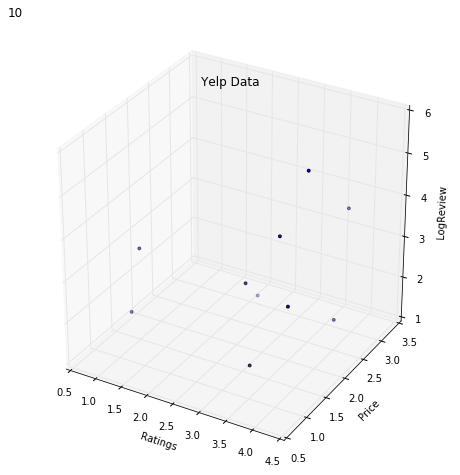


20


Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 22592     |

| 1             | 20336     |

| 2             | 23396     |

| 3             | 15710     |

| 4             | 18872     |

| 5             | 7185      |

| 10            | 575       |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 2717                          |

| 2         | 1066                          |

| 3         | 691                           |

| 4         | 501                           |

| 5         | 375                           |

| 6         | 280                           |

| 7         | 314                           |

| 8         | 237                           |

| 9         | 267                           |

| 10        | 258                           |

| 11        | 193                           |

| 12        | 183                           |

| 13        | 145                           |

| 14        | 235                           |

| 15        | 49                            |

| 16        | 23                            |

| 17        | 66                            |

| 18        | 41                            |

| 19        | 58                            |

| 20        | 79                            |

| 21        | 121                           |

| 22        | 193                           |

| 23        | 165                           |

| 24        | 69                            |

| 25        | 50                            |

| 26        | 59                            |

| 27        | 60                            |

| 28        | 57                            |

| 29        | 34                            |

| 30        | 108                           |

| 31        | 24                            |

| 32        | 35                            |

| 33        | 23                            |

| 34        | 7                             |

| 35        | 9                             |

| 36        | 1                             |

| 37        | 0                             |

+-----------+-------------------------------+

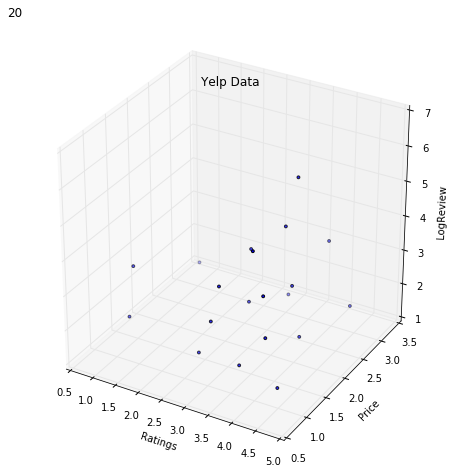


30


Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 10442     |

| 1             | 21476     |

| 2             | 15628     |

| 3             | 24216     |

| 4             | 10230     |

| 5             | 15900     |

| 10            | 12666     |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 3143                          |

| 2         | 1805                          |

| 3         | 904                           |

| 4         | 620                           |

| 5         | 444                           |

| 6         | 602                           |

| 7         | 557                           |

| 8         | 333                           |

| 9         | 219                           |

| 10        | 227                           |

| 11        | 122                           |

| 12        | 160                           |

| 13        | 112                           |

| 14        | 70                            |

| 15        | 83                            |

| 16        | 49                            |

| 17        | 23                            |

| 18        | 14                            |

| 19        | 17                            |

| 20        | 35                            |

| 21        | 8                             |

| 22        | 1                             |

| 23        | 0                             |

+-----------+-------------------------------+

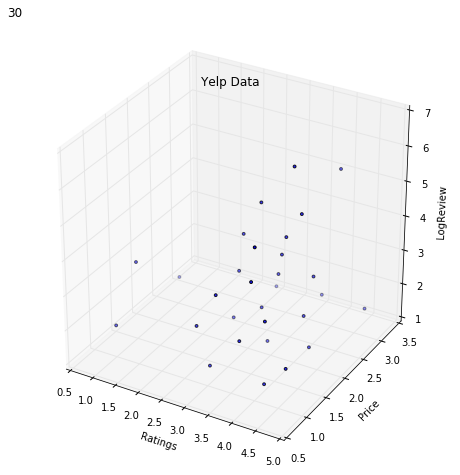


40


Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 9657      |

| 1             | 18808     |

| 2             | 24734     |

| 3             | 21272     |

| 4             | 5694      |

| 5             | 12359     |

| 10            | 3070      |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 2602                          |

| 2         | 1346                          |

| 3         | 845                           |

| 4         | 524                           |

| 5         | 522                           |

| 6         | 286                           |

| 7         | 266                           |

| 8         | 229                           |

| 9         | 163                           |

| 10        | 76                            |

| 11        | 63                            |

| 12        | 60                            |

| 13        | 86                            |

| 14        | 88                            |

| 15        | 122                           |

| 16        | 137                           |

| 17        | 124                           |

| 18        | 99                            |

| 19        | 89                            |

| 20        | 74                            |

| 21        | 95                            |

| 22        | 127                           |

| 23        | 91                            |

| 24        | 98                            |

| 25        | 98                            |

| 26        | 71                            |

| 27        | 77                            |

| 28        | 81                            |

| 29        | 61                            |

| 30        | 38                            |

| 31        | 26                            |

| 32        | 20                            |

| 33        | 6                             |

| 34        | 6                             |

| 35        | 4                             |

| 36        | 4                             |

| 37        | 6                             |

| 38        | 0                             |

+-----------+-------------------------------+

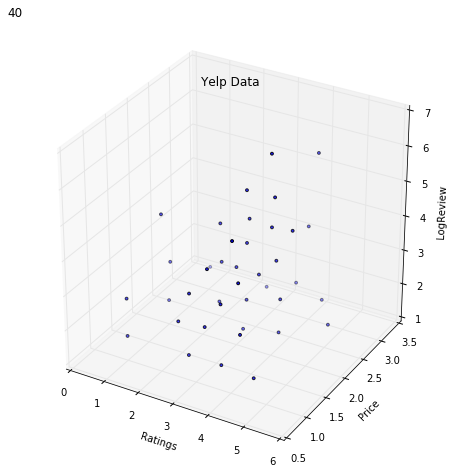


50


Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 7105      |

| 1             | 5820      |

| 2             | 11122     |

| 3             | 11723     |

| 4             | 24816     |

| 5             | 17269     |

| 10            | 16810     |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 2300                          |

| 2         | 1442                          |

| 3         | 892                           |

| 4         | 693                           |

| 5         | 311                           |

| 6         | 203                           |

| 7         | 91                            |

| 8         | 85                            |

| 9         | 58                            |

| 10        | 39                            |

| 11        | 54                            |

| 12        | 71                            |

| 13        | 57                            |

| 14        | 46                            |

| 15        | 47                            |

| 16        | 55                            |

| 17        | 44                            |

| 18        | 36                            |

| 19        | 33                            |

| 20        | 48                            |

| 21        | 44                            |

| 22        | 46                            |

| 23        | 49                            |

| 24        | 27                            |

| 25        | 19                            |

| 26        | 30                            |

| 27        | 13                            |

| 28        | 10                            |

| 29        | 9                             |

| 30        | 15                            |

| 31        | 14                            |

| 32        | 15                            |

| 33        | 14                            |

| 34        | 31                            |

| 35        | 19                            |

| 36        | 8                             |

| 37        | 18                            |

| 38        | 4                             |

| 39        | 3                             |

| 40        | 0                             |

+-----------+-------------------------------+

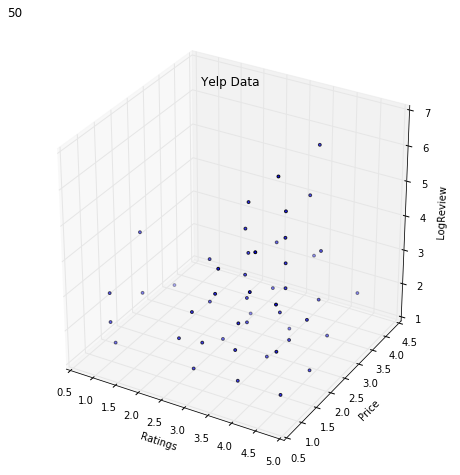


60


Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 5051      |

| 1             | 16853     |

| 2             | 3619      |

| 3             | 6023      |

| 4             | 18211     |

| 5             | 14029     |

| 10            | 2829      |

| 50            | 11769     |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 2171                          |

| 2         | 1136                          |

| 3         | 838                           |

| 4         | 703                           |

| 5         | 339                           |

| 6         | 243                           |

| 7         | 297                           |

| 8         | 366                           |

| 9         | 196                           |

| 10        | 153                           |

| 11        | 158                           |

| 12        | 79                            |

| 13        | 53                            |

| 14        | 34                            |

| 15        | 78                            |

| 16        | 35                            |

| 17        | 30                            |

| 18        | 18                            |

| 19        | 19                            |

| 20        | 42                            |

| 21        | 9                             |

| 22        | 12                            |

| 23        | 3                             |

| 24        | 5                             |

| 25        | 13                            |

| 26        | 4                             |

| 27        | 1                             |

| 28        | 0                             |

+-----------+-------------------------------+

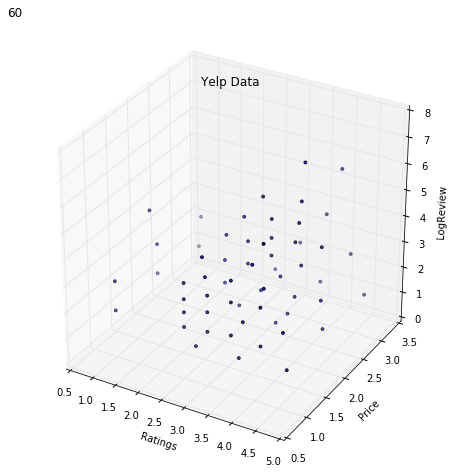


70


Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 24049     |

| 1             | 4129      |

| 2             | 9462      |

| 3             | 8423      |

| 4             | 3106      |

| 5             | 11982     |

| 10            | 22367     |

| 50            | 19039     |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 3178                          |

| 2         | 1512                          |

| 3         | 1067                          |

| 4         | 724                           |

| 5         | 674                           |

| 6         | 391                           |

| 7         | 389                           |

| 8         | 238                           |

| 9         | 167                           |

| 10        | 102                           |

| 11        | 93                            |

| 12        | 122                           |

| 13        | 139                           |

| 14        | 64                            |

| 15        | 39                            |

| 16        | 15                            |

| 17        | 27                            |

| 18        | 36                            |

| 19        | 19                            |

| 20        | 16                            |

| 21        | 11                            |

| 22        | 21                            |

| 23        | 5                             |

| 24        | 14                            |

| 25        | 15                            |

| 26        | 8                             |

| 27        | 3                             |

| 28        | 0                             |

+-----------+-------------------------------+

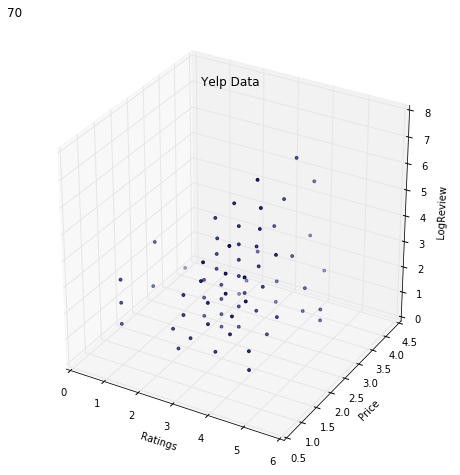


80


Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 18119     |

| 1             | 2023      |

| 2             | 24507     |

| 3             | 4799      |

| 4             | 5607      |

| 5             | 14344     |

| 10            | 13728     |

| 50            | 13457     |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 2589                          |

| 2         | 1377                          |

| 3         | 643                           |

| 4         | 435                           |

| 5         | 322                           |

| 6         | 274                           |

| 7         | 225                           |

| 8         | 134                           |

| 9         | 86                            |

| 10        | 89                            |

| 11        | 88                            |

| 12        | 66                            |

| 13        | 93                            |

| 14        | 70                            |

| 15        | 56                            |

| 16        | 96                            |

| 17        | 51                            |

| 18        | 59                            |

| 19        | 49                            |

| 20        | 55                            |

| 21        | 21                            |

| 22        | 30                            |

| 23        | 41                            |

| 24        | 17                            |

| 25        | 13                            |

| 26        | 2                             |

| 27        | 4                             |

| 28        | 0                             |

+-----------+-------------------------------+

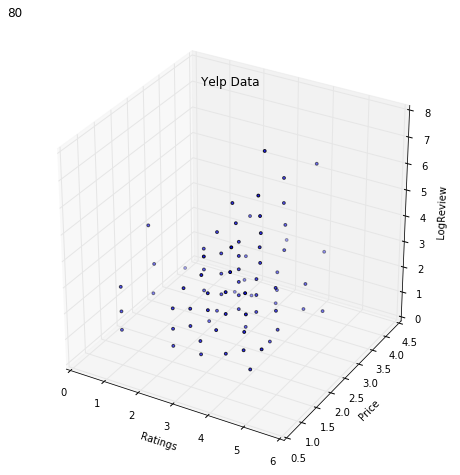


90


Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 9744      |

| 1             | 14873     |

| 2             | 4566      |

| 3             | 5813      |

| 4             | 19081     |

| 5             | 235       |

| 10            | 16215     |

| 50            | 13533     |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 2199                          |

| 2         | 969                           |

| 3         | 755                           |

| 4         | 467                           |

| 5         | 310                           |

| 6         | 342                           |

| 7         | 322                           |

| 8         | 236                           |

| 9         | 176                           |

| 10        | 169                           |

| 11        | 143                           |

| 12        | 130                           |

| 13        | 81                            |

| 14        | 104                           |

| 15        | 96                            |

| 16        | 66                            |

| 17        | 83                            |

| 18        | 51                            |

| 19        | 86                            |

| 20        | 66                            |

| 21        | 33                            |

| 22        | 24                            |

| 23        | 28                            |

| 24        | 56                            |

| 25        | 31                            |

| 26        | 25                            |

| 27        | 30                            |

| 28        | 45                            |

| 29        | 28                            |

| 30        | 20                            |

| 31        | 21                            |

| 32        | 22                            |

| 33        | 20                            |

| 34        | 21                            |

| 35        | 50                            |

| 36        | 32                            |

| 37        | 11                            |

| 38        | 12                            |

| 39        | 6                             |

| 40        | 1                             |

| 41        | 4                             |

| 42        | 8                             |

| 43        | 3                             |

| 44        | 2                             |

| 45        | 1                             |

| 46        | 3                             |

| 47        | 1                             |

| 48        | 0                             |

+-----------+-------------------------------+

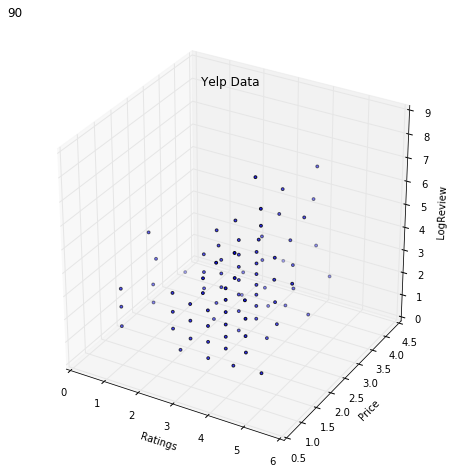


100


Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 16810     |

| 1             | 6412      |

| 2             | 1586      |

| 3             | 7169      |

| 4             | 9451      |

| 5             | 1609      |

| 10            | 14600     |

| 50            | 15008     |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 1679                          |

| 2         | 962                           |

| 3         | 647                           |

| 4         | 553                           |

| 5         | 363                           |

| 6         | 217                           |

| 7         | 123                           |

| 8         | 105                           |

| 9         | 44                            |

| 10        | 18                            |

| 11        | 39                            |

| 12        | 19                            |

| 13        | 12                            |

| 14        | 11                            |

| 15        | 12                            |

| 16        | 14                            |

| 17        | 4                             |

| 18        | 9                             |

| 19        | 10                            |

| 20        | 20                            |

| 21        | 13                            |

| 22        | 13                            |

| 23        | 16                            |

| 24        | 15                            |

| 25        | 12                            |

| 26        | 4                             |

| 27        | 3                             |

| 28        | 2                             |

| 29        | 1                             |

| 30        | 2                             |

| 31        | 0                             |

+-----------+-------------------------------+

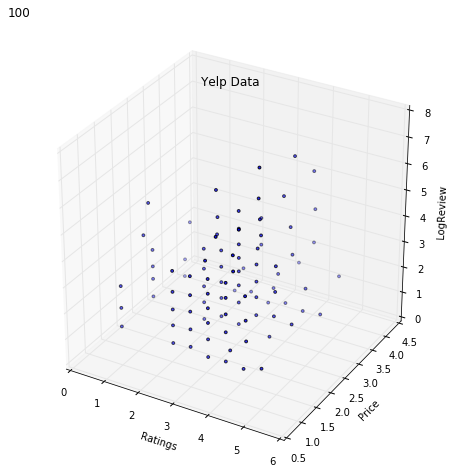

In [173]:
### RUN KMEANS GRID
distance = []
for i in range(10,101,10):
    raw_input()
    print i
    k=i
    kmeans_model = gl.kmeans.create(kdatar, num_clusters=k, max_iterations=200)
    distance = distance + [sum(kmeans_model.cluster_id['distance'])]
    plotcluster(kmeans_model['cluster_info'],i)


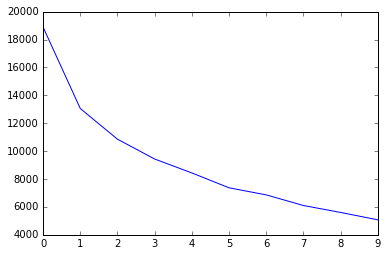

In [174]:

### PLOT TOTAL DISTANCE FROM CENTROIDS FOR EACH K FROM 5 TO 100

plt.plot(distance)


In [45]:
kdatar.head()

stars,PriceRange,LogReviewCnt
4.5,1.0,1.38629436112
5.0,1.0,2.99573227355
4.0,1.0,3.04452243772
3.5,1.0,2.07944154168
4.0,1.0,1.94591014906
4.5,1.0,4.06044301055
3.5,1.0,1.79175946923
3.0,2.0,1.94591014906
3.5,1.0,1.60943791243
2.5,1.0,2.19722457734


In [175]:
### PREDICT CLUSTER
new_resto = gl.SFrame({'stars': [4.5, 5, 4],
                  'PriceRange': [1,1,1],
                  'LogReviewCnt': [1.38629436,2.9957322,3.04452243772]})
kclusterid = kmeans_model.predict(new_resto, output_type='cluster_id')
print kclusterid

[34, 71, 5]


In [31]:
### SAVE KMEANS MODEL TO A FILE
kmeans_model.save('KMEANSModel25')

In [ ]:
### LOAD KMEANS MODEL
kmeans_model = graphlab.load_model('KMEANSModel25')

In [ ]:
########### END KMEANS ANALYSIS ##################################

In [ ]:
########### START DBSCAN ANALYSIS ##################################

In [176]:
dbsmodel = gl.dbscan.create(kdatar, features=None, distance='euclidean',
                 radius=0.2, min_core_neighbors=50, verbose=True)

Starting brute force nearest neighbors model training.

Starting blockwise similarity graph construction.

max rows per data block: 8189

number of reference data blocks: 4

+---------+-------------+--------------+

| # Pairs | % Complete. | Elapsed Time |

+---------+-------------+--------------+

| 1.2e+08 | 29.992      | 9.01s        |

| 2.4e+08 | 59.9856     | 14.08s       |

| 3.1e+08 | 79.9841     | 17.03s       |

| 3.5e+08 | 89.9841     | 19.11s       |

| 3.9e+08 | 99.9841     | 20.79s       |

| 3.9e+08 | 100         | 20.82s       |

+---------+-------------+--------------+

[INFO] graphlab.toolkits.clustering.dbscan: Identifying noise points and core points.
[INFO] graphlab.toolkits.clustering.dbscan: Constructing the core point similarity graph.


+-----------------------------+

| Number of components merged |

+-----------------------------+

| 89128                       |

| 0                           |

+-----------------------------+

[INFO] graphlab.toolkits.clustering.dbscan: Processing boundary points.


In [75]:
dbsmodel

Class                                    : DBSCANModel

Schema
------
Number of examples                       : 25082
Number of feature columns                : 3
Max distance to a neighbor (radius)      : 0.2
Min number of neighbors for core points  : 50
Number of distance components            : 1

Training summary
----------------
Total training time (seconds)            : 51.9075
Number of clusters                       : 51

Accessible fields
-----------------
cluster_id                              : Cluster label for each row in the input dataset.

In [172]:
#dir(dbsmodel)

#dbsmodel.summary
#print dbsmodel["cluster_id"].print_rows(10)
dbsmodel["cluster_id"]

row_id,cluster_id,type
12300,26,core
12270,36,core
12250,21,core
12230,15,core
12124,5,core
12061,18,core
12042,18,core
12039,40,core
12031,18,core
11970,14,core


,stars,PriceRange,LogReviewCnt
cluster_id,,,
46.0,4.5,1.0,3.254461
47.0,4.0,2.0,3.900413
48.0,3.0,3.0,1.098612
49.0,4.0,3.0,5.394219
50.0,4.5,2.0,1.386294


In [177]:
### DEFINE CENTROIDS FUNCTION
# data is SFrame containing numeric data of features
def centroids(data,dbsmodel):
        X = dbsmodel['cluster_id'].to_dataframe()
        # X.columns
        # Y=data.to_dataframe()
        Y=data
        Y['row_id'] = np.arange(Y.shape[0])
        Y = Y.merge(X,on='row_id',how='left')
        # Y.head(10)
        type = Y['type']
        Y.drop('type',inplace=True,axis=1)
        Y.drop('row_id',inplace=True,axis=1)
        Centroids = Y.groupby('cluster_id').mean()
        return Centroids

In [178]:
### GET MODEL CENTROIDS
# Input is pandas dataframe and model
Centroids = centroids(kdatar.to_dataframe(),dbsmodel)
Centroids.tail()

,stars,PriceRange,LogReviewCnt
cluster_id,,,
46.0,4.0,2.0,3.900413
47.0,4.5,3.0,1.386294
48.0,3.0,3.0,1.098612
49.0,4.5,2.0,1.386294
50.0,4.0,3.0,5.394219


In [179]:
### CREATE PREDICT FUNCTION FOR DBS 
def dbscan_predict(centroids, new_resto):
      import numpy as np
        
      data = new_resto.values
      ans  = np.arange(data.shape[0])
      X    = centroids.values  
      for i in range(data.shape[0]):       
                dist = np.sum((X-data[i,:].reshape(1,-1))**2,axis=1)
                cluster_id = np.argmin(dist)
                ans[i] = cluster_id
      return(ans)          

In [164]:
# xx5=new_resto.to_dataframe().values[0]
#Centroids.values-xx5
(Centroids.values-xx5).reshape(1,-1)

array([[ 2.21208517,  0.73108742, -1.35816087, -0.38629436,  0.63799505,
        -2.37259695]])

In [ ]:
np.sum((Centroids.values-xx5.reshape(1,-1))**2,axis=1)

In [114]:
### MAKE TEST RECORD FOR PREDICT DBS CLUSTER (no predict function for dbs)
new_resto = gl.SFrame({'stars': [4.5, 5, 4],
                  'PriceRange': [1,1,1],
                  'LogReviewCnt': [1.38629436,2.9957322,3.04452243772]})
#dclusterid = dbsmodel.predict(new_resto, output_type='cluster_id')
#print dclusterid

In [180]:
### PREDICT DBS CLUSTER FOR NEW OBSERVATION
dbscan_predict(Centroids,new_resto.to_dataframe())


array([41, 23, 40])


0.1


Starting brute force nearest neighbors model training.

Starting blockwise similarity graph construction.

max rows per data block: 8189

number of reference data blocks: 4

+---------+-------------+--------------+

| # Pairs | % Complete. | Elapsed Time |

+---------+-------------+--------------+

| 1.2e+08 | 29.992      | 6.39s        |

| 2.4e+08 | 59.9856     | 11.01s       |

| 3.1e+08 | 79.9841     | 14.52s       |

| 3.1e+08 | 79.9841     | 16.37s       |

| 3.5e+08 | 89.9841     | 16.55s       |

| 3.9e+08 | 99.9841     | 18.03s       |

| 3.9e+08 | 100         | 18.05s       |

+---------+-------------+--------------+

[INFO] graphlab.toolkits.clustering.dbscan: Identifying noise points and core points.
[INFO] graphlab.toolkits.clustering.dbscan: Constructing the core point similarity graph.


+-----------------------------+

| Number of components merged |

+-----------------------------+

| 77504                       |

| 0                           |

+-----------------------------+

[INFO] graphlab.toolkits.clustering.dbscan: Processing boundary points.


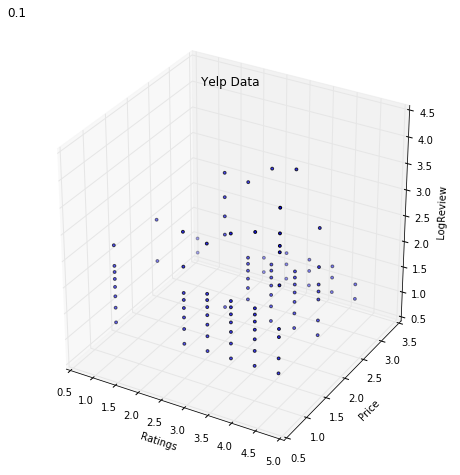


0.2


Starting brute force nearest neighbors model training.

Starting blockwise similarity graph construction.

max rows per data block: 8189

number of reference data blocks: 4

+---------+-------------+--------------+

| # Pairs | % Complete. | Elapsed Time |

+---------+-------------+--------------+

| 1.2e+08 | 39.9888     | 7.92s        |

| 2.4e+08 | 59.9856     | 12.50s       |

| 3.1e+08 | 79.9841     | 15.72s       |

| 3.5e+08 | 89.9841     | 17.74s       |

| 3.9e+08 | 99.9841     | 19.14s       |

| 3.9e+08 | 100         | 19.17s       |

+---------+-------------+--------------+

[INFO] graphlab.toolkits.clustering.dbscan: Identifying noise points and core points.
[INFO] graphlab.toolkits.clustering.dbscan: Constructing the core point similarity graph.


+-----------------------------+

| Number of components merged |

+-----------------------------+

| 89128                       |

| 0                           |

+-----------------------------+

[INFO] graphlab.toolkits.clustering.dbscan: Processing boundary points.


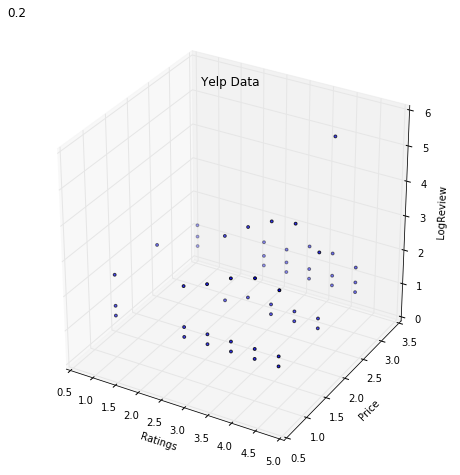


0.3


Starting brute force nearest neighbors model training.

Starting blockwise similarity graph construction.

max rows per data block: 8189

number of reference data blocks: 4

+---------+-------------+--------------+

| # Pairs | % Complete. | Elapsed Time |

+---------+-------------+--------------+

| 1.2e+08 | 29.992      | 7.06s        |

| 2.4e+08 | 59.9856     | 12.18s       |

| 3.1e+08 | 79.9841     | 15.90s       |

| 3.1e+08 | 79.9841     | 17.90s       |

| 3.5e+08 | 89.9841     | 18.00s       |

| 3.9e+08 | 99.9841     | 19.62s       |

| 3.9e+08 | 100         | 19.66s       |

+---------+-------------+--------------+

[INFO] graphlab.toolkits.clustering.dbscan: Identifying noise points and core points.
[INFO] graphlab.toolkits.clustering.dbscan: Constructing the core point similarity graph.


+-----------------------------+

| Number of components merged |

+-----------------------------+

| 93656                       |

| 0                           |

+-----------------------------+

[INFO] graphlab.toolkits.clustering.dbscan: Processing boundary points.


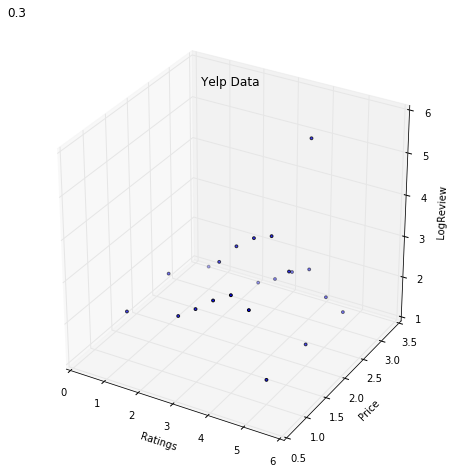


0.4


Starting brute force nearest neighbors model training.

Starting blockwise similarity graph construction.

max rows per data block: 8189

number of reference data blocks: 4

+---------+-------------+--------------+

| # Pairs | % Complete. | Elapsed Time |

+---------+-------------+--------------+

| 1.2e+08 | 29.992      | 8.09s        |

| 2.4e+08 | 59.9856     | 12.70s       |

| 3.1e+08 | 79.9841     | 16.03s       |

| 3.1e+08 | 79.9841     | 17.83s       |

| 3.5e+08 | 89.9841     | 18.07s       |

| 3.9e+08 | 99.9841     | 19.45s       |

| 3.9e+08 | 100         | 19.50s       |

+---------+-------------+--------------+

[INFO] graphlab.toolkits.clustering.dbscan: Identifying noise points and core points.
[INFO] graphlab.toolkits.clustering.dbscan: Constructing the core point similarity graph.


+-----------------------------+

| Number of components merged |

+-----------------------------+

| 95188                       |

| 0                           |

+-----------------------------+

[INFO] graphlab.toolkits.clustering.dbscan: Processing boundary points.


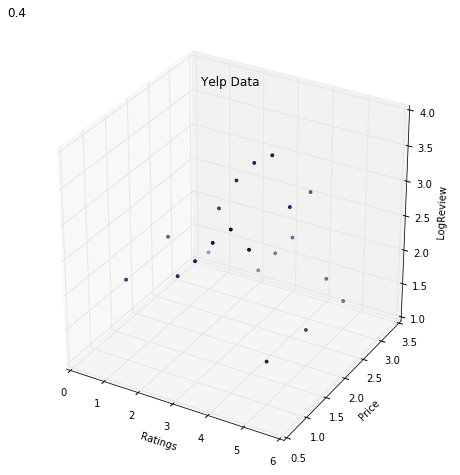


0.5


Starting brute force nearest neighbors model training.

Starting blockwise similarity graph construction.

max rows per data block: 8189

number of reference data blocks: 4

+---------+-------------+--------------+

| # Pairs | % Complete. | Elapsed Time |

+---------+-------------+--------------+

| 1.2e+08 | 29.992      | 7.28s        |

| 2.4e+08 | 59.9856     | 11.98s       |

| 3.1e+08 | 79.9841     | 15.51s       |

| 3.1e+08 | 79.9841     | 17.46s       |

| 3.5e+08 | 89.9841     | 17.59s       |

| 3.9e+08 | 99.9841     | 18.96s       |

| 3.9e+08 | 100         | 19.03s       |

+---------+-------------+--------------+

[INFO] graphlab.toolkits.clustering.dbscan: Identifying noise points and core points.
[INFO] graphlab.toolkits.clustering.dbscan: Constructing the core point similarity graph.


+-----------------------------+

| Number of components merged |

+-----------------------------+

| 96548                       |

| 0                           |

+-----------------------------+

[INFO] graphlab.toolkits.clustering.dbscan: Processing boundary points.


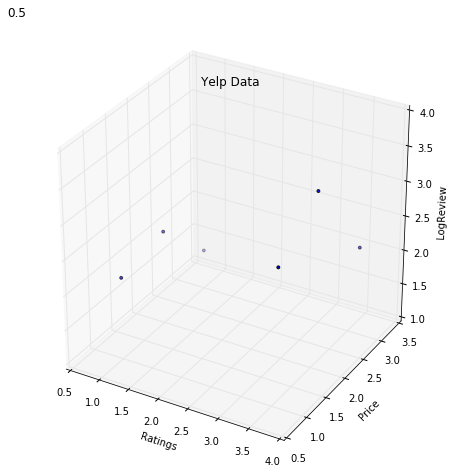


0.6


Starting brute force nearest neighbors model training.

Starting blockwise similarity graph construction.

max rows per data block: 8189

number of reference data blocks: 4

+---------+-------------+--------------+

| # Pairs | % Complete. | Elapsed Time |

+---------+-------------+--------------+

| 1.2e+08 | 29.992      | 7.75s        |

| 2.4e+08 | 59.9856     | 12.80s       |

| 3.1e+08 | 79.9841     | 16.30s       |

| 3.5e+08 | 89.9841     | 18.43s       |

| 3.9e+08 | 99.9841     | 20.08s       |

| 3.9e+08 | 100         | 20.21s       |

+---------+-------------+--------------+

[INFO] graphlab.toolkits.clustering.dbscan: Identifying noise points and core points.
[INFO] graphlab.toolkits.clustering.dbscan: Constructing the core point similarity graph.


+-----------------------------+

| Number of components merged |

+-----------------------------+

| 98324                       |

| 0                           |

+-----------------------------+

[INFO] graphlab.toolkits.clustering.dbscan: Processing boundary points.


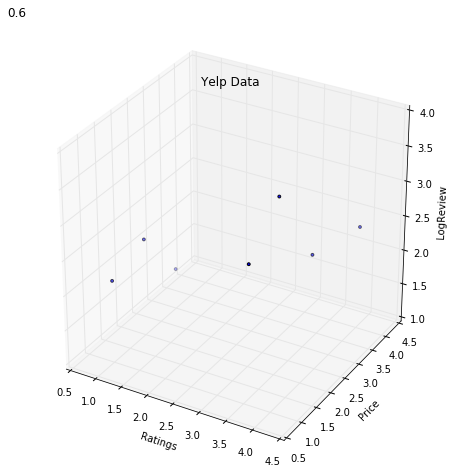


0.7


Starting brute force nearest neighbors model training.

Starting blockwise similarity graph construction.

max rows per data block: 8189

number of reference data blocks: 4

+---------+-------------+--------------+

| # Pairs | % Complete. | Elapsed Time |

+---------+-------------+--------------+

| 1.2e+08 | 29.992      | 8.60s        |

| 2.4e+08 | 59.9856     | 14.72s       |

| 3.1e+08 | 79.9841     | 18.17s       |

| 3.5e+08 | 89.9841     | 20.38s       |

| 3.9e+08 | 99.9841     | 22.24s       |

| 3.9e+08 | 100         | 22.42s       |

+---------+-------------+--------------+

[INFO] graphlab.toolkits.clustering.dbscan: Identifying noise points and core points.
[INFO] graphlab.toolkits.clustering.dbscan: Constructing the core point similarity graph.


+-----------------------------+

| Number of components merged |

+-----------------------------+

| 98828                       |

| 0                           |

+-----------------------------+

[INFO] graphlab.toolkits.clustering.dbscan: Processing boundary points.


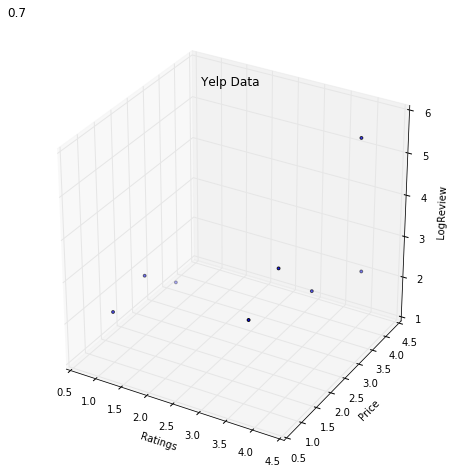


0.8


Starting brute force nearest neighbors model training.

Starting blockwise similarity graph construction.

max rows per data block: 8189

number of reference data blocks: 4

+---------+-------------+--------------+

| # Pairs | % Complete. | Elapsed Time |

+---------+-------------+--------------+

| 1.2e+08 | 29.992      | 7.94s        |

| 2.4e+08 | 59.9856     | 13.69s       |

| 3.1e+08 | 79.9841     | 17.60s       |

| 3.5e+08 | 89.9841     | 19.85s       |

| 3.9e+08 | 99.9841     | 21.69s       |

| 3.9e+08 | 100         | 21.90s       |

+---------+-------------+--------------+

[INFO] graphlab.toolkits.clustering.dbscan: Identifying noise points and core points.
[INFO] graphlab.toolkits.clustering.dbscan: Constructing the core point similarity graph.


+-----------------------------+

| Number of components merged |

+-----------------------------+

| 99180                       |

| 0                           |

+-----------------------------+

[INFO] graphlab.toolkits.clustering.dbscan: Processing boundary points.


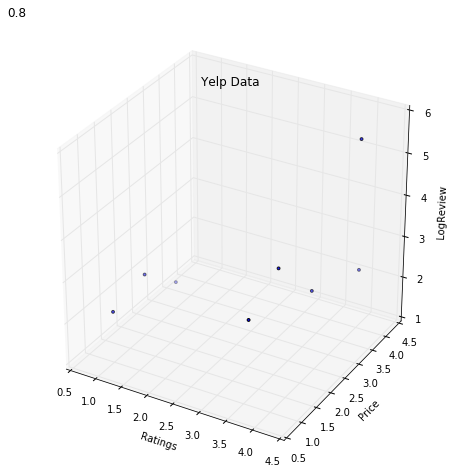


0.9


Starting brute force nearest neighbors model training.

Starting blockwise similarity graph construction.

max rows per data block: 8189

number of reference data blocks: 4

+---------+-------------+--------------+

| # Pairs | % Complete. | Elapsed Time |

+---------+-------------+--------------+

| 1.2e+08 | 29.992      | 6.34s        |

| 2.4e+08 | 59.9856     | 13.92s       |

| 3.1e+08 | 79.9841     | 18.77s       |

| 3.5e+08 | 89.9841     | 21.06s       |

| 3.9e+08 | 99.9841     | 23.33s       |

| 3.9e+08 | 100         | 23.71s       |

+---------+-------------+--------------+

[INFO] graphlab.toolkits.clustering.dbscan: Identifying noise points and core points.
[INFO] graphlab.toolkits.clustering.dbscan: Constructing the core point similarity graph.


+-----------------------------+

| Number of components merged |

+-----------------------------+

| 99392                       |

| 0                           |

+-----------------------------+

[INFO] graphlab.toolkits.clustering.dbscan: Processing boundary points.


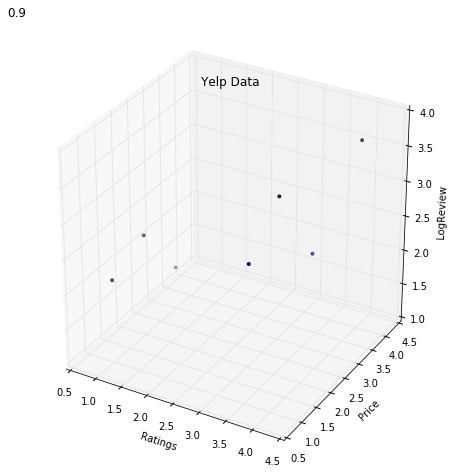


1.0


Starting brute force nearest neighbors model training.

Starting blockwise similarity graph construction.

max rows per data block: 8189

number of reference data blocks: 4

+---------+-------------+--------------+

| # Pairs | % Complete. | Elapsed Time |

+---------+-------------+--------------+

| 1.2e+08 | 29.992      | 8.52s        |

| 2.4e+08 | 59.9856     | 14.92s       |

| 3.1e+08 | 79.9841     | 18.24s       |

| 3.5e+08 | 89.9841     | 20.83s       |

| 3.9e+08 | 99.9841     | 23.52s       |

| 3.9e+08 | 100         | 23.82s       |

+---------+-------------+--------------+

[INFO] graphlab.toolkits.clustering.dbscan: Identifying noise points and core points.
[INFO] graphlab.toolkits.clustering.dbscan: Constructing the core point similarity graph.


+-----------------------------+

| Number of components merged |

+-----------------------------+

| 99796                       |

| 0                           |

+-----------------------------+

[INFO] graphlab.toolkits.clustering.dbscan: Processing boundary points.


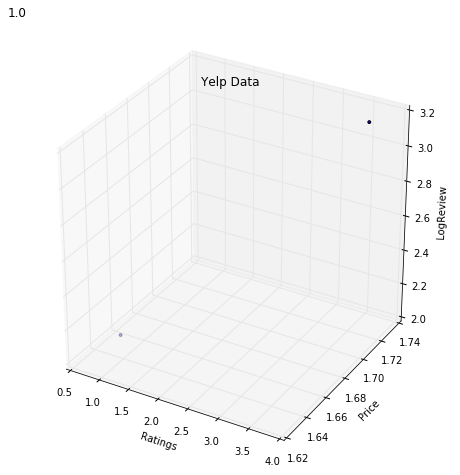

In [119]:
### RUN DBS CLUSTER GRID
distance = []
nclust =[]
for i in range(1,11,1):
    j=i/10.0
    raw_input()
    print j
    k=j
    dbsmodel = gl.dbscan.create(kdatar, features=None, distance='euclidean',
                 radius=k, min_core_neighbors=50, verbose=True)
    centroid = centroids(kdatar.to_dataframe(),dbsmodel)
    nclust = nclust + [centroid.shape[0]]
    plotcluster(centroid,k)

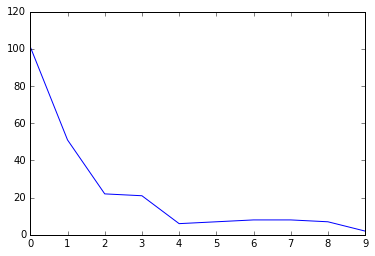

In [120]:
### PLOT TOTAL DISTANCE FROM CENTROIDS FOR EACH K FROM 5 TO 100

plt.plot(nclust)


In [121]:
nclust

[101, 51, 22, 21, 6, 7, 8, 8, 7, 2]

In [ ]:
########### ODDS AND ENDS #########################################

In [210]:
### GET COLUMN NAMES FOR SFRAMES
#kdata.column_names

In [139]:
minidata = kdata[:20]
na_outd = (np.isnan(minidata['Outdoor']))
len(na_outd)
na_outd[:10]

array([False, False, False, False, False, False, False, False, False, False], dtype=bool)

In [125]:
#data['categories'].values
#any(el[1] == 'str_1' for el in t)
any(cat == 'Restaurant' for cat in data.categories[0])
[n for n, (i, s) in enumerate(t) if s == 'str_3']
#data.categories.values
# sum(data.loc[data['elitecnt']!=0,'elitecnt'].value_counts())
# data.loc[data['elitecnt']!=0,'elitecnt'].value_counts()

<generator object <genexpr> at 0x1626c30f0>

In [165]:
### AIKO FUNCTION TO GET ITEM INSIDE DATAFRAME
def ProcessID(data,token):

    ID = []

    for item in data:
        if token in item.keys():
            ID.append(item[token])
        else:
            ID.append({})

    return(ID)


In [49]:
### USING AIKO FUNCTION
#amb = ProcessID(minidata["categories"], 'Ambience')
#amb

In [50]:
### GET ELEMENTS INSIDE DICT
#minidata.iloc[0].attributes.get('Ambience')

In [89]:
# GET UNIQUE ATTRIBUTES
# attkeys=[]
# for i in range(len(data)):
#    attkeys = attkeys + data.loc[i].attributes.keys()
# set(attkeys)

In [110]:
### HISTOGRAM
# minidata['attributes'].hist(bins=25)

In [85]:
### Boxplot
# data.boxplot(column='review_count',return_type='axes')

In [86]:
### Boxplot with Group by
#data.boxplot(column='average_stars', by = 'elitecnt')

In [87]:
#data.boxplot(column='stars', by = 'review_count')

In [88]:
#data.boxplot(column='fans', by = 'average_stars')

In [ ]:
### CALCULATE NUMBER OF ROWS SATISFYING CONDITION
sum([1 for x in restodata["stars"] if x=None])

In [ ]:
### ACCESS ELEMENTS USING INDEX NUMBERS
data.iloc[3:5,2:4]

In [ ]:
### ACCESS ELEMENTS USING COLUMN NAMES
data.loc[0,"attributes"]
data.ix for mixed

In [18]:
np.array(restodata['PriceRange'])

array([ 1.,  1.,  1., ...,  1.,  2.,  2.])

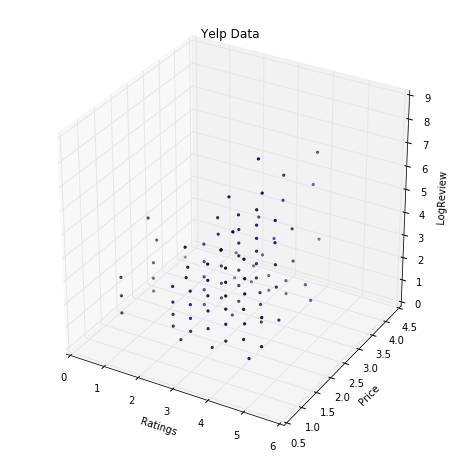

In [76]:
kmeans_model.show(view="evaluation")

Canvas is accessible via web browser at the URL: http://localhost:50938/index.html
Opening Canvas in default web browser.


In [235]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


def randrange(n, vmin, vmax):
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
n = 100
for c, m, zl, zh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zl, zh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()
